In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [12]:
df = pd.read_csv("BostonHousing.csv")

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
# Normalize/standardize numerical features

target_col = 'medv'
X = df.drop(columns=[target_col])
y = df[target_col]

# Only apply scaling to numeric columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
X_scaled = scaler.fit_transform(X[numeric_cols])

# Convert scaled array back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols)

# Combining scaled features with target again if required
df_scaled = pd.concat([X_scaled_df, y], axis=1)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size = 0.2, random_state = 42)

In [16]:
# Choose appropriate features for the model

# Calculate correlation with target
correlations = df_scaled.corr()['medv'].drop('medv').sort_values(ascending=False)

# Display top N most correlated features
top_features = correlations.head(10).index.tolist()
print("Top features:", top_features)

# Select only top features for training
X_selected = X_scaled_df[top_features]

Top features: ['rm', 'zn', 'b', 'dis', 'chas', 'age', 'rad', 'crim', 'nox', 'tax']


In [17]:
# Train a linear regression model

from sklearn.model_selection import train_test_split
X_train_sel, X_test_sel, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train_sel, y_train)
y_pred = lr_model.predict(X_test_sel)

In [18]:
# Evaluate the model using metrics such as Mean Squared Error (MSE), R-squared

from sklearn.metrics import mean_squared_error, r2_score

In [19]:
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.5501183636452649
RMSE: 5.743824716010178


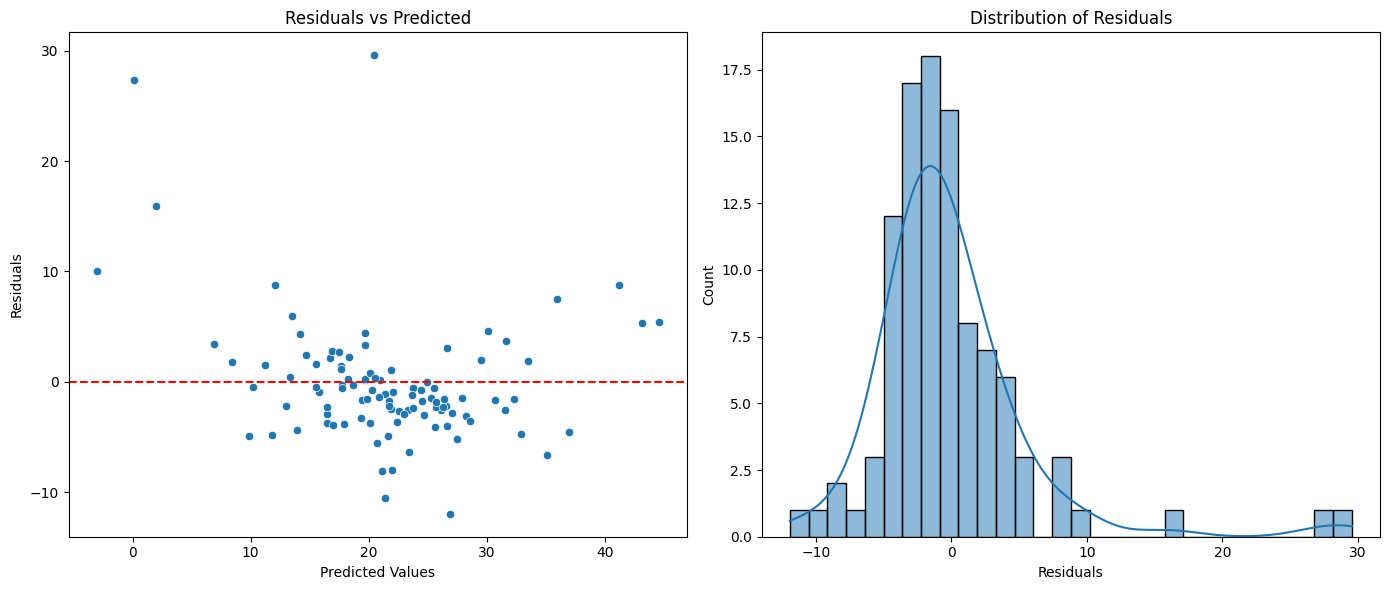

In [20]:
# Plot residuals to check the assumptions of linear regression

residuals = y_test - y_pred

# Set up the plots
plt.figure(figsize=(14, 6))

# 1. Residuals vs Predicted
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# 2. Distribution of Residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

In [22]:
# Compare model performance with different feature sets or preprocessing steps

def evaluate_model(X, y, name="Model"):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"{name}- R²: {r2:.4f}, RMSE: {rmse:.4f}")
    return r2, rmse


In [23]:
# All standardized features
evaluate_model(X_scaled_df, y, name="All Features (Standardized)")

All Features (Standardized)- R²: 0.6688, RMSE: 4.9286


(0.668759493535632, np.float64(4.928602182665337))

In [25]:
# Unscaled original features
X_original = df.drop(columns=['medv'])

evaluate_model(X_original, y, name="Original (Unscaled) Features")


Original (Unscaled) Features- R²: 0.6688, RMSE: 4.9286


(0.6687594935356326, np.float64(4.928602182665332))